*Щелканов А. КЭ-402*

# Задание

Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил. Список результирующих правил должен выдаваться в удобочитаемом виде (антецедент→консеквент) с указанием поддержки и достоверности каждого правила. Дополнительные параметры программы:
- порог достоверности
- способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

Проведите эксперименты на наборах из задания 1. В экспериментах Зафиксируйте значение пороговое значение поддержки (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%).

Выполните визуализацию полученных результатов в виде следующих диаграмм:
- сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности;
- общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности.

Подготовьте список правил, в которых **антецедент** и **консеквент** суммарно включают в себя не более семи объектов (разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.

# Решение

**Загрузка данных**

In [3]:
import pandas as pd

df = pd.read_csv("/content/baskets.csv", encoding='windows-1251')
df

,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
0,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,низкокалорийный йогурт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Преобразуем DataFrame в список транзакций, кодируем их в бинарную матрицу с помощью TransactionEncoder и создаем новый DataFrame с закодированными данными

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_encoded, min_support=0.002, use_colnames=True)

Измеряем среднее время выполнения и количество ассоциативных правил при разных порогах достоверности (confidence). Для каждого порога выполняется 50 прогонов, чтобы усреднить результаты и минимизировать влияние случайных колебаний.

In [75]:
import time
import numpy as np
from mlxtend.frequent_patterns import association_rules

confidence_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95] # пороги достоверности
num_runs = 50 # количество итераций

avg_times = []
avg_rule_counts = []

for conf in confidence_values:
    run_times = []
    run_rule_counts = []

    for _ in range(num_runs):
        start_time = time.time()
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
        elapsed_time = time.time() - start_time

        run_times.append(elapsed_time)
        run_rule_counts.append(len(rules))

    # Вычисляем средние значения
    avg_times.append(np.mean(run_times))
    avg_rule_counts.append(np.mean(run_rule_counts))

Отображение полученных результатов.

При увеличении значения порога достоверности время выполнения сокращается, как и количество ассоциативных правил.

При увеличении порога достоверности отбрасываются слабые правила, так как остаются только сильные зависимости, удовлетворяющие более строгому условию. Меньше правил приводит к уменьшению объема вычислений и времени выполнения, так как алгоритм обрабатывает меньше данных и раньше прекращает проверку неподходящих правил.

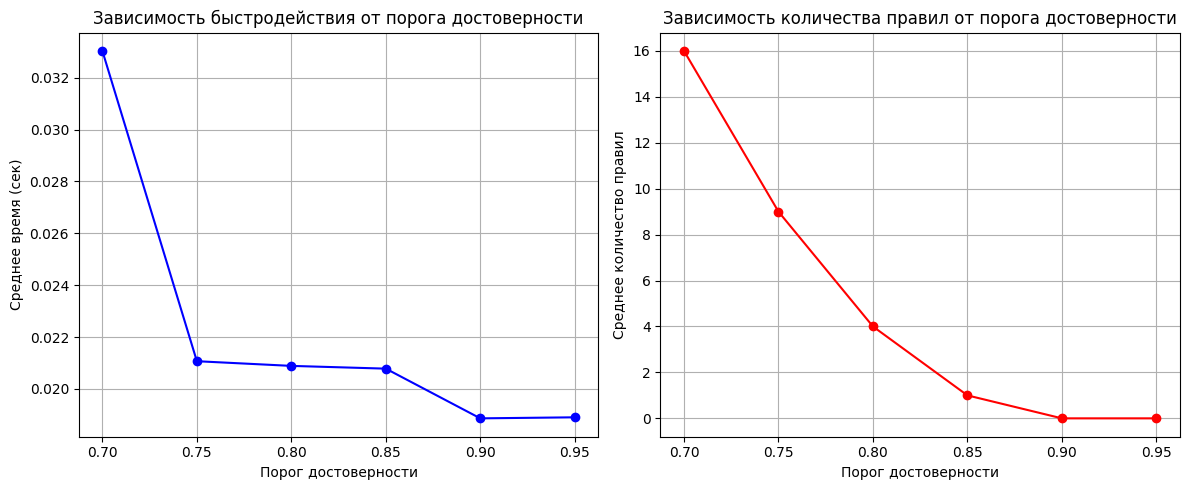

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# график среднего времени выполнения
plt.subplot(1, 2, 1)
plt.plot(confidence_values, avg_times, marker='o', linestyle='-', color='b')
plt.title('Зависимость быстродействия от порога достоверности')
plt.xlabel('Порог достоверности')
plt.ylabel('Среднее время (сек)')
plt.grid(True)

# график среднего количества правил
plt.subplot(1, 2, 2)
plt.plot(confidence_values, avg_rule_counts, marker='o', linestyle='-', color='r')
plt.title('Зависимость количества правил от порога достоверности')
plt.xlabel('Порог достоверности')
plt.ylabel('Среднее количество правил')
plt.grid(True)

plt.tight_layout()
plt.show()

In [83]:
rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# фильтр по суммарной длине антецедента и консеквента
rules_df = rules_df[rules_df.apply(
    lambda row: len(row['antecedents']) + len(row['consequents']) <= 7, axis=1)]

rules_df['antecedents_str'] = rules_df['antecedents'].apply(lambda x: ', '.join(sorted(x)))
rules_df['consequents_str'] = rules_df['consequents'].apply(lambda x: ', '.join(sorted(x)))

rules_df['total_items'] = rules_df['antecedents'].apply(len) + rules_df['consequents'].apply(len)

# округление числовых значений
rules_df = rules_df.round({
    'support': 4,
    'confidence': 4,
    'lift': 2,
    'leverage': 4,
    'conviction': 2
})

columns_order = [
    'antecedents_str',
    'consequents_str',
    'support',
    'confidence',
    'lift',
    'total_items'
]

final_df = rules_df[columns_order].sort_values(by='support', ascending=False)
final_df

,antecedents_str,consequents_str,support,confidence,lift,total_items
0,"грибной соус, эскалоп",макароны,0.0043,0.7442,3.96,3
9,"замороженные овощи, молоко, суп",минеральная вода,0.0031,0.7667,3.22,4
11,"макароны, растительное масло, яйца",минеральная вода,0.0031,0.7188,3.02,4
10,"замороженные овощи, оливковое масло, шоколад",минеральная вода,0.0028,0.7000,2.94,4
13,"молоко, оливковое масло, яйца",минеральная вода,0.0027,0.7143,3.00,4
2,"макароны, обезжиренное молоко",минеральная вода,0.0025,0.7308,3.07,3
6,"говяжий фарш, замороженные овощи, креветки",макароны,0.0025,0.7917,4.21,4
4,"блинчики, макароны, растительное масло",минеральная вода,0.0023,0.7391,3.10,4
5,"блинчики, макароны, суп",минеральная вода,0.0023,0.7727,3.24,4
8,"замороженные овощи, оливковое масло, помидоры",макароны,0.0021,0.8421,4.48,4


# Проверка графиков со средним значением в ряде опытов

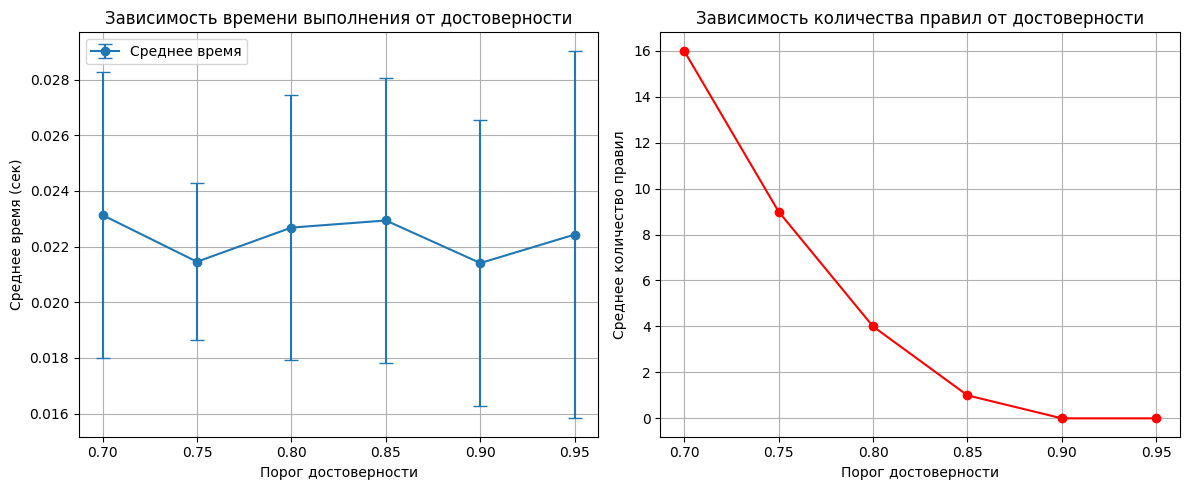

In [66]:
import time
import numpy as np
from mlxtend.frequent_patterns import association_rules

confidence_values = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
num_runs = 50  # Увеличено количество прогонов для статистики
num_iterations = 10  # Количество повторений в одном прогоне

avg_times = []
std_times = []
avg_rule_counts = []

for conf in confidence_values:
    run_times = []
    run_rule_counts = []

    for _ in range(num_runs):
        # Запускаем несколько итераций в одном прогоне
        start_time = time.perf_counter()  # Более точный таймер
        for _ in range(num_iterations):
            rules = association_rules(frequent_itemsets,
                                     metric="confidence",
                                     min_threshold=conf)
        elapsed_time = (time.perf_counter() - start_time) / num_iterations

        run_times.append(elapsed_time)
        run_rule_counts.append(len(rules))

    # Статистика по времени
    avg_times.append(np.mean(run_times))
    std_times.append(np.std(run_times))

    # Статистика по количеству правил
    avg_rule_counts.append(np.mean(run_rule_counts))

# Визуализация с отображением погрешностей
plt.figure(figsize=(12, 5))

# График времени
plt.subplot(1, 2, 1)
plt.errorbar(confidence_values, avg_times, yerr=std_times,
             fmt='o-', capsize=5, label='Среднее время')3
plt.title('Зависимость времени выполнения от достоверности')
plt.xlabel('Порог достоверности')
plt.ylabel('Среднее время (сек)')
plt.grid(True)
plt.legend()

# График количества правил
plt.subplot(1, 2, 2)
plt.plot(confidence_values, avg_rule_counts, marker='o', color='r', linestyle='-')
plt.title('Зависимость количества правил от достоверности')
plt.xlabel('Порог достоверности')
plt.ylabel('Среднее количество правил')
plt.grid(True)

plt.tight_layout()
plt.show()